In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [4]:
path = r'O:\Data-Work\22_Plant_Production-CH\224.5_Oleagineux_proteagineux_Protein_Oelfruechte\Colza\COLORS\2022\Notations\Aurelie'

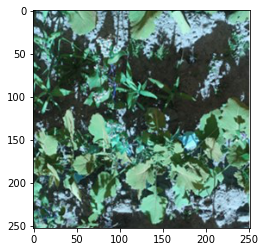

In [17]:
path1 = path + '\\img3.jpg'
img1 = cv2.imread(path1)
plt.imshow(img1)

In [6]:
def Canopeo(img):

    R, G, B = img[:,:,2], img[:,:,1], img[:,:,0]

    cond1 = R/G
    cond2 = B/G
    cond3 = 2*G-R-B

    P1, P2, P3 = 0.95, 0.95, 20

    out = np.logical_and(cond1<P1, np.logical_and(cond2<P2, cond3>P3))

    return out

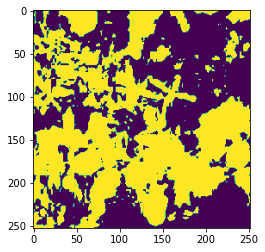

In [18]:
mask = Canopeo(img1)
plt.imshow(mask)

In [115]:
empty = np.zeros(img1.shape)
cond = np.logical_and(img1[:,:,2]>150,img1[:,:,1]<=150)
green = img1[:,:,1]>=150
empty[cond,0] = 127
empty[cond,2] = 255
empty[green,1] = 220
empty[green,0] = 60

In [19]:
empty = np.zeros(img1.shape)
cond = mask
empty[cond,0] = 127
empty[cond,2] = 255

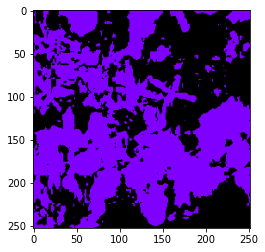

In [20]:
plt.imshow(empty.astype('uint8'))

In [21]:
cv2.imwrite(path+'\\canopA3.jpg',empty)

True